#Task 5 : Exploratory Data Analysis (EDA)


##1) Importing Libraries and Data


In [1]:
# Step 1: Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Loading the Titanic dataset
df = pd.read_csv("train.csv")

# Step 3: Viewing first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##2) Performing Basic Exploration on data

In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Checking missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Shape of dataset
df.shape

(891, 12)

In [7]:
# Column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##3) Counting Values for Categorical Columns

In [12]:
# Count of values in categorical columns
print(df['Sex'].value_counts())
print()
print(df['Pclass'].value_counts())
print()
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


##4) Handling Missing Values

In [15]:
# Filling missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filling missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Dropping Cabin column as too many missing values
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##5) Performing Univariate Analysis

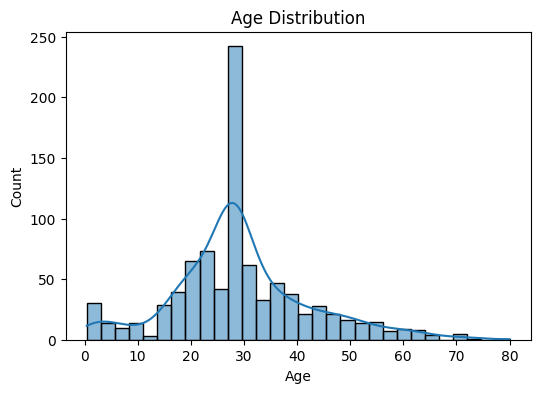

In [17]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Obervation :

Most passengers were aged between 20–40, with fewer elderly passengers.

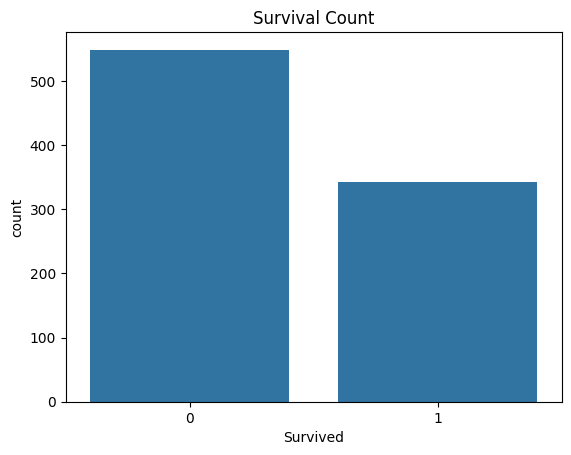

In [18]:
# Countplot of Survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

Observation :

More people died than survived on the Titanic.

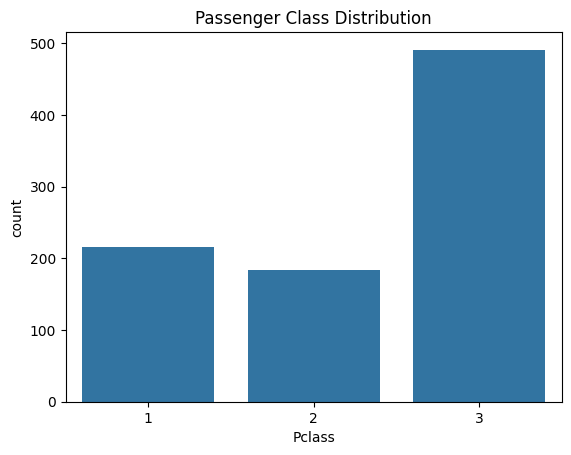

In [19]:
# Countplot of Passenger Class
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

Observation :

3rd class had the most passengers, followed by 1st and 2nd.

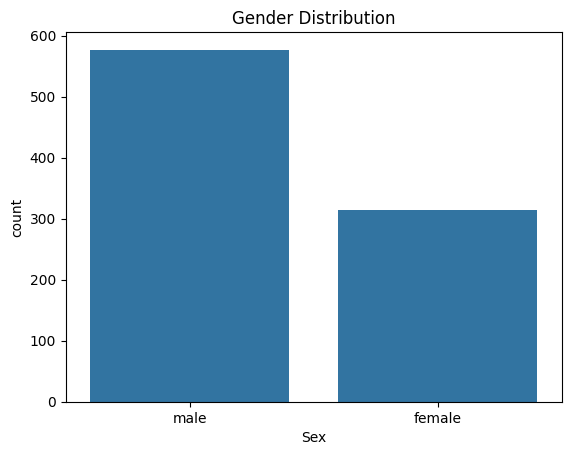

In [20]:
# Countplot of Sex
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

Observation :

There were significantly more males than females onboard.

##6) Performing Bivariate Analysis

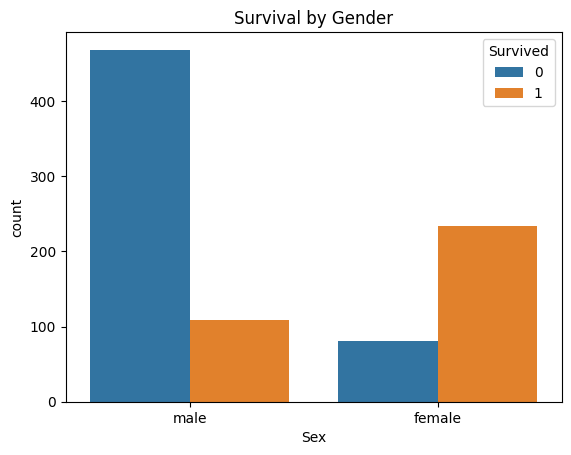

In [21]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

Observation :

Females had a much higher survival rate than males.

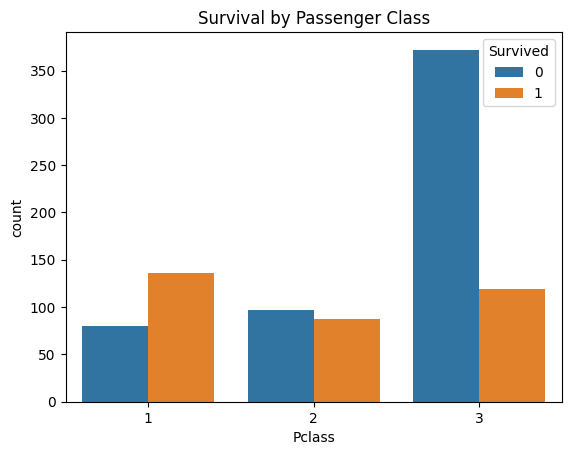

In [22]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

Observation :

First-class passengers survived more often than lower classes.

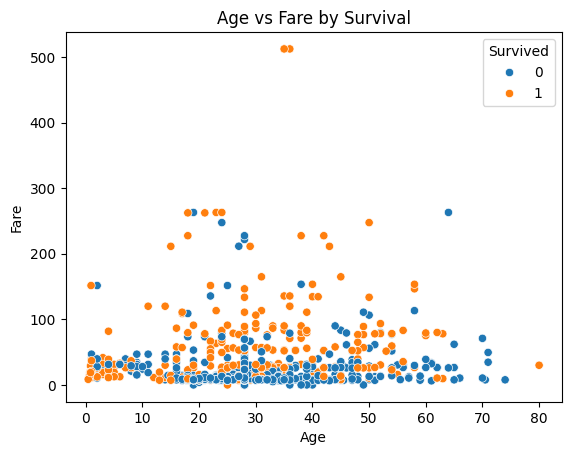

In [23]:
# Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()

Observation :

Higher fares were mostly paid by first-class survivors.

##7) Correlation & Heatmap

In [24]:
# Converting categorical to numeric for correlation
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

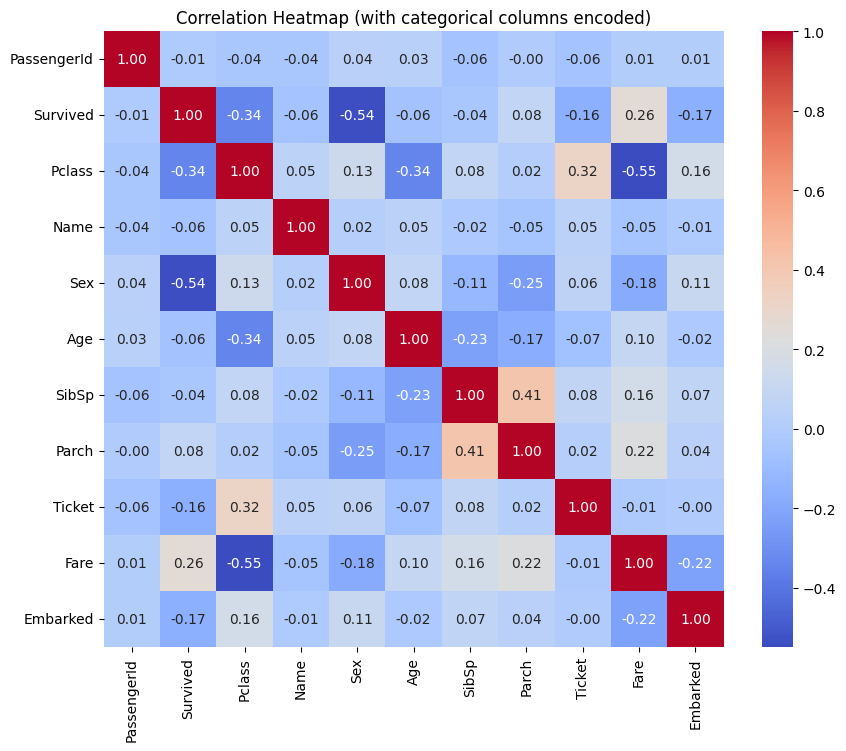

In [29]:
df_encoded = df.copy()

# Encoding categorical columns (Label Encoding)
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Computing correlation
corr_matrix = df_encoded.corr()

# Plotting the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (with categorical columns encoded)")
plt.show()

Observation :

Survival is positively correlated with fare and being female, and negatively with passenger class number.



##8) Pairplot for Relationships

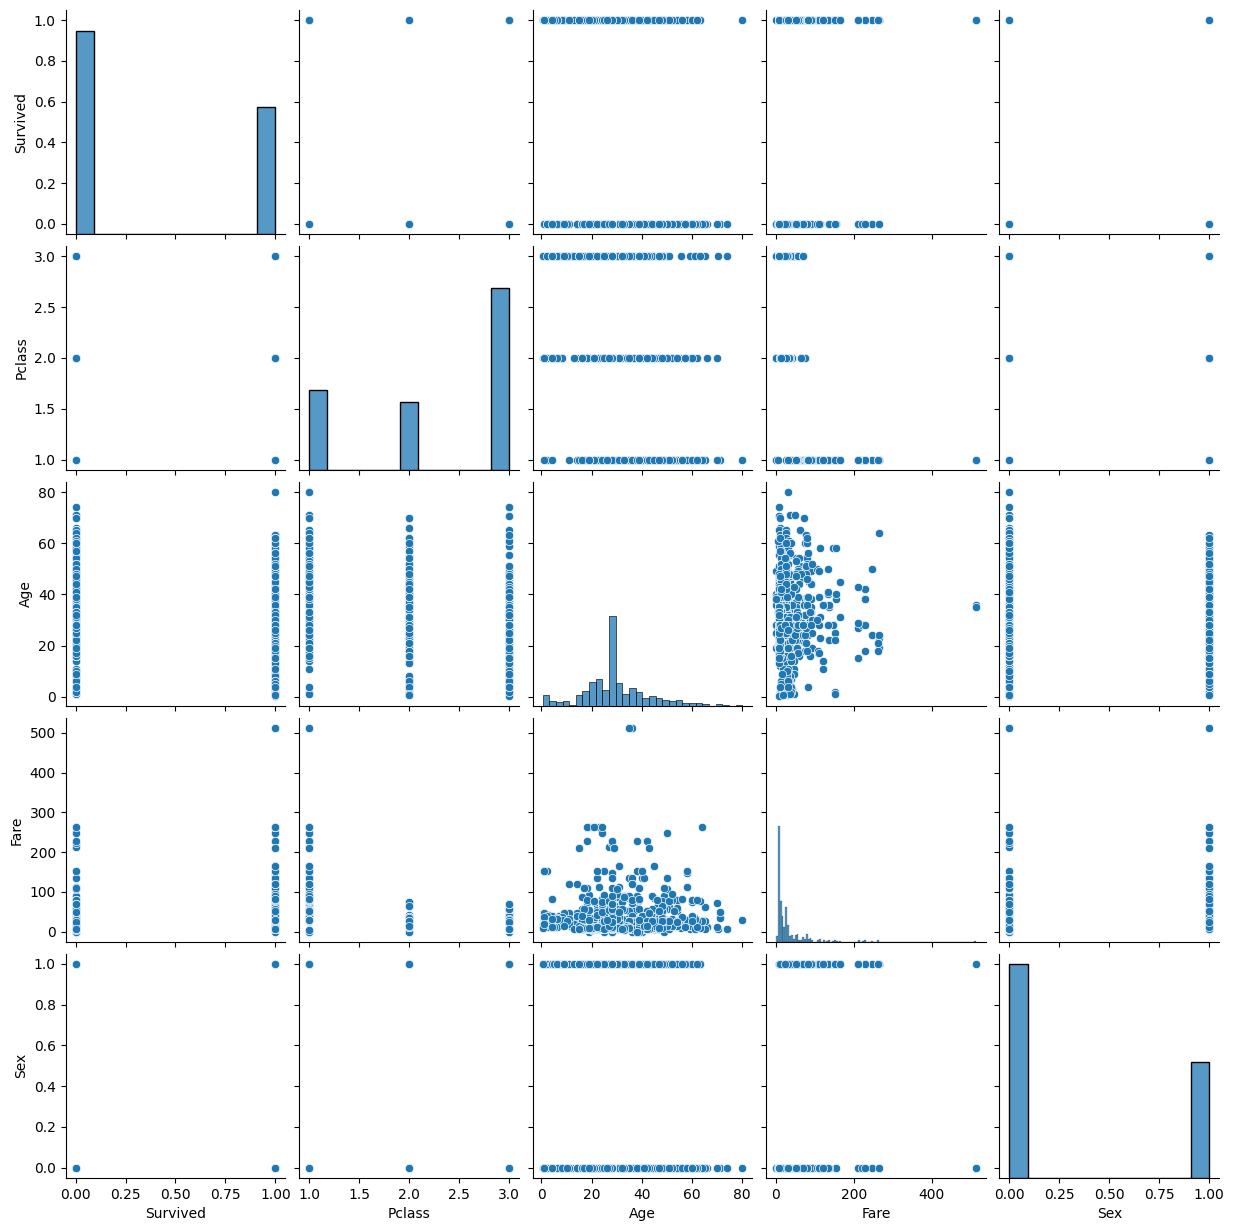

In [30]:
sns.pairplot(df_corr[['Survived','Pclass','Age','Fare','Sex']])
plt.show()

 Observation :

 Survivors tend to be female, younger, and paid higher fares.

##9) Boxplot for Outliers

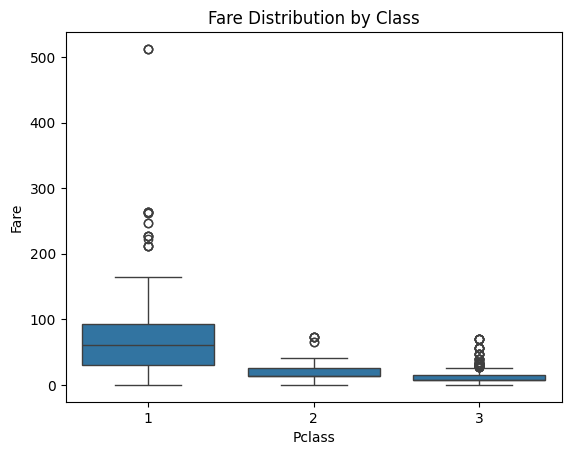

In [31]:
# Fare by Class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()

Observation :

First-class passengers paid much higher fares, with outliers paying extremely high amounts.

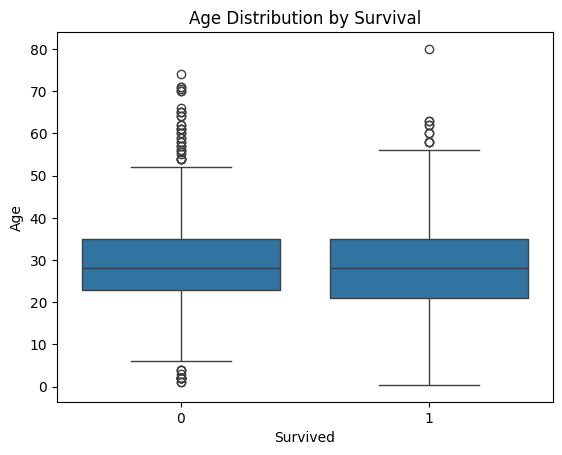

In [32]:
# Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


Observation :

Survivors included more young children, especially under age 10.